In [533]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df1=pd.read_csv("CarPrice_Assignment.csv")
df=df1.copy()
df

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

# Exploratory Data Analysis (EDA)

In [534]:
display(df.info())
#print data types
print(pd.DataFrame(df.dtypes).T)
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

None

  car_ID symboling CarName fueltype aspiration doornumber carbody drivewheel  \
0  int64     int64  object   object     object     object  object     object   

  enginelocation wheelbase  ... enginesize fuelsystem boreratio   stroke  \
0         object   float64  ...      int64     object   float64  float64   

  compressionratio horsepower peakrpm citympg highwaympg    price  
0          float64      int64   int64   int64      int64  float64  

[1 rows x 26 columns]


car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [535]:
df.head()


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [536]:
# Checking for missing values
display(df.isnull().sum())
display(df.count())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

car_ID              205
symboling           205
CarName             205
fueltype            205
aspiration          205
doornumber          205
carbody             205
drivewheel          205
enginelocation      205
wheelbase           205
carlength           205
carwidth            205
carheight           205
curbweight          205
enginetype          205
cylindernumber      205
enginesize          205
fuelsystem          205
boreratio           205
stroke              205
compressionratio    205
horsepower          205
peakrpm             205
citympg             205
highwaympg          205
price               205
dtype: int64

In [537]:
dtypes=df.dtypes
uniques=df.nunique()
display(pd.DataFrame({"Data type": dtypes,"Uniques":uniques}).T)


car_ID symboling CarName fueltype aspiration doornumber carbody  \
Data type  int64     int64  object   object     object     object  object   
Uniques      205         6     147        2          2          2       5   

          drivewheel enginelocation wheelbase  ... enginesize fuelsystem  \
Data type     object         object   float64  ...      int64     object   
Uniques            3              2        53  ...         44          8   

          boreratio   stroke compressionratio horsepower peakrpm citympg  \
Data type   float64  float64          float64      int64   int64   int64   
Uniques          38       37               32         59      23      29   

          highwaympg    price  
Data type      int64  float64  
Uniques           30      189  

[2 rows x 26 columns]

In [538]:
integ=df.select_dtypes(include=["int64"])
integtype=integ.dtypes
int_uniques=integ.nunique()
display(pd.DataFrame({"Data type": integtype,"Uniques":int_uniques}).T)

car_ID symboling curbweight enginesize horsepower peakrpm citympg  \
Data type  int64     int64      int64      int64      int64   int64   int64   
Uniques      205         6        171         44         59      23      29   

          highwaympg  
Data type      int64  
Uniques           30

In [539]:
objec=df.select_dtypes(include=["object"])
objectype=objec.dtypes
objec_uniques=objec.nunique()
display(pd.DataFrame({"Data type": objectype,"Uniques":objec_uniques}).T)

CarName fueltype aspiration doornumber carbody drivewheel  \
Data type  object   object     object     object  object     object   
Uniques       147        2          2          2       5          3   

          enginelocation enginetype cylindernumber fuelsystem  
Data type         object     object         object     object  
Uniques                2          7              7          8

In [540]:
floa=df.select_dtypes(include=["float64"])
floatype=floa.dtypes
floa_uniques=floa.nunique()
display(pd.DataFrame({"Data type": floatype,"Uniques":floa_uniques}).T)

wheelbase carlength carwidth carheight boreratio   stroke  \
Data type   float64   float64  float64   float64   float64  float64   
Uniques          53        75       44        49        38       37   

          compressionratio    price  
Data type          float64  float64  
Uniques                 32      189

In [541]:
num_cols=df.select_dtypes(include=["float"])
num_cols

wheelbase  carlength  carwidth  carheight  boreratio  stroke  \
0         88.6      168.8      64.1       48.8       3.47    2.68   
1         88.6      168.8      64.1       48.8       3.47    2.68   
2         94.5      171.2      65.5       52.4       2.68    3.47   
3         99.8      176.6      66.2       54.3       3.19    3.40   
4         99.4      176.6      66.4       54.3       3.19    3.40   
..         ...        ...       ...        ...        ...     ...   
200      109.1      188.8      68.9       55.5       3.78    3.15   
201      109.1      188.8      68.8       55.5       3.78    3.15   
202      109.1      188.8      68.9       55.5       3.58    2.87   
203      109.1      188.8      68.9       55.5       3.01    3.40   
204      109.1      188.8      68.9       55.5       3.78    3.15   

     compressionratio    price  
0                 9.0  13495.0  
1                 9.0  16500.0  
2                 9.0  16500.0  
3                10.0  13950.0  
4                 8.0  17450.0  
..                ...      ...  
200               9.5  16845.0  
201               8.7  19045.0  
202               8.8  21485.0  
203              23.0  22470.0  
204               9.5  22625.0  

[205 rows x 8 columns]

In [542]:
display(df.describe())

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

### Check outliers

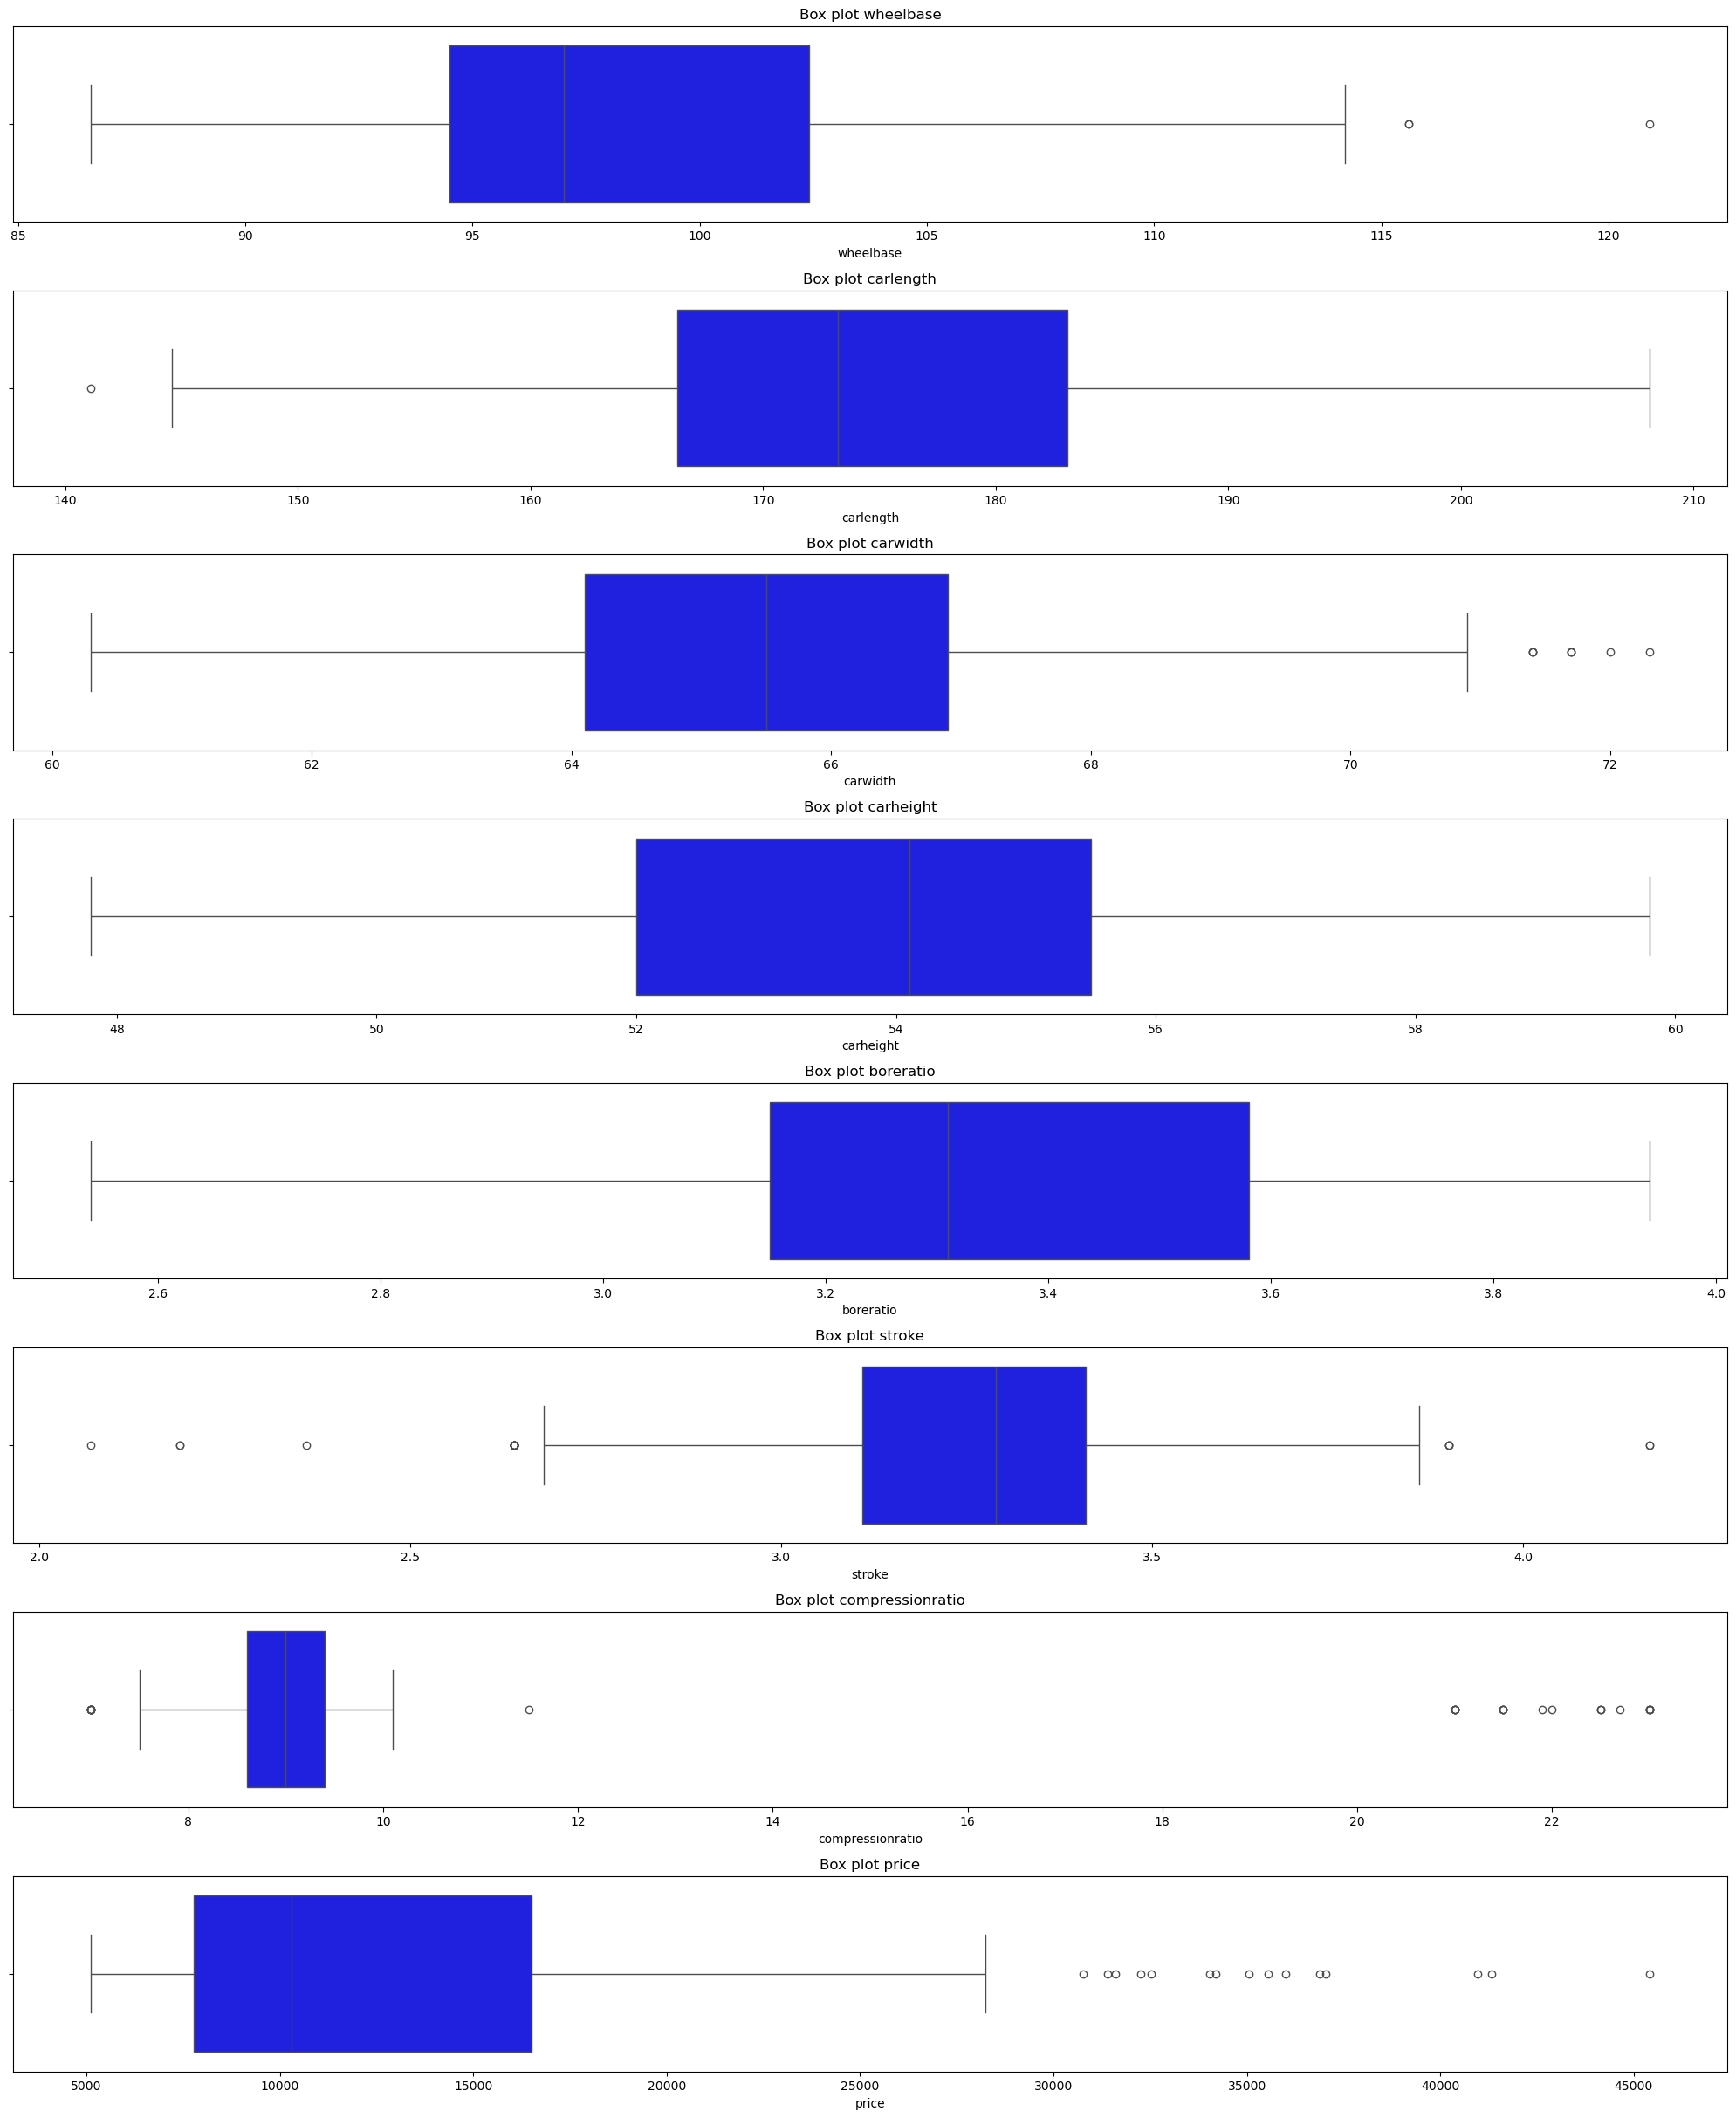

In [543]:
def boxplots(num_cols):
  plt.figure(figsize=(20,30))
  for index,col in enumerate(num_cols.columns,start=1):
    plt.subplot(10,1,index)
    plt.title(f"Box plot {col}")
    sns.boxplot(x=col,data=num_cols,color="blue")
  plt.tight_layout()
  plt.show()

boxplots(num_cols)

### Data  Distribution Graphs

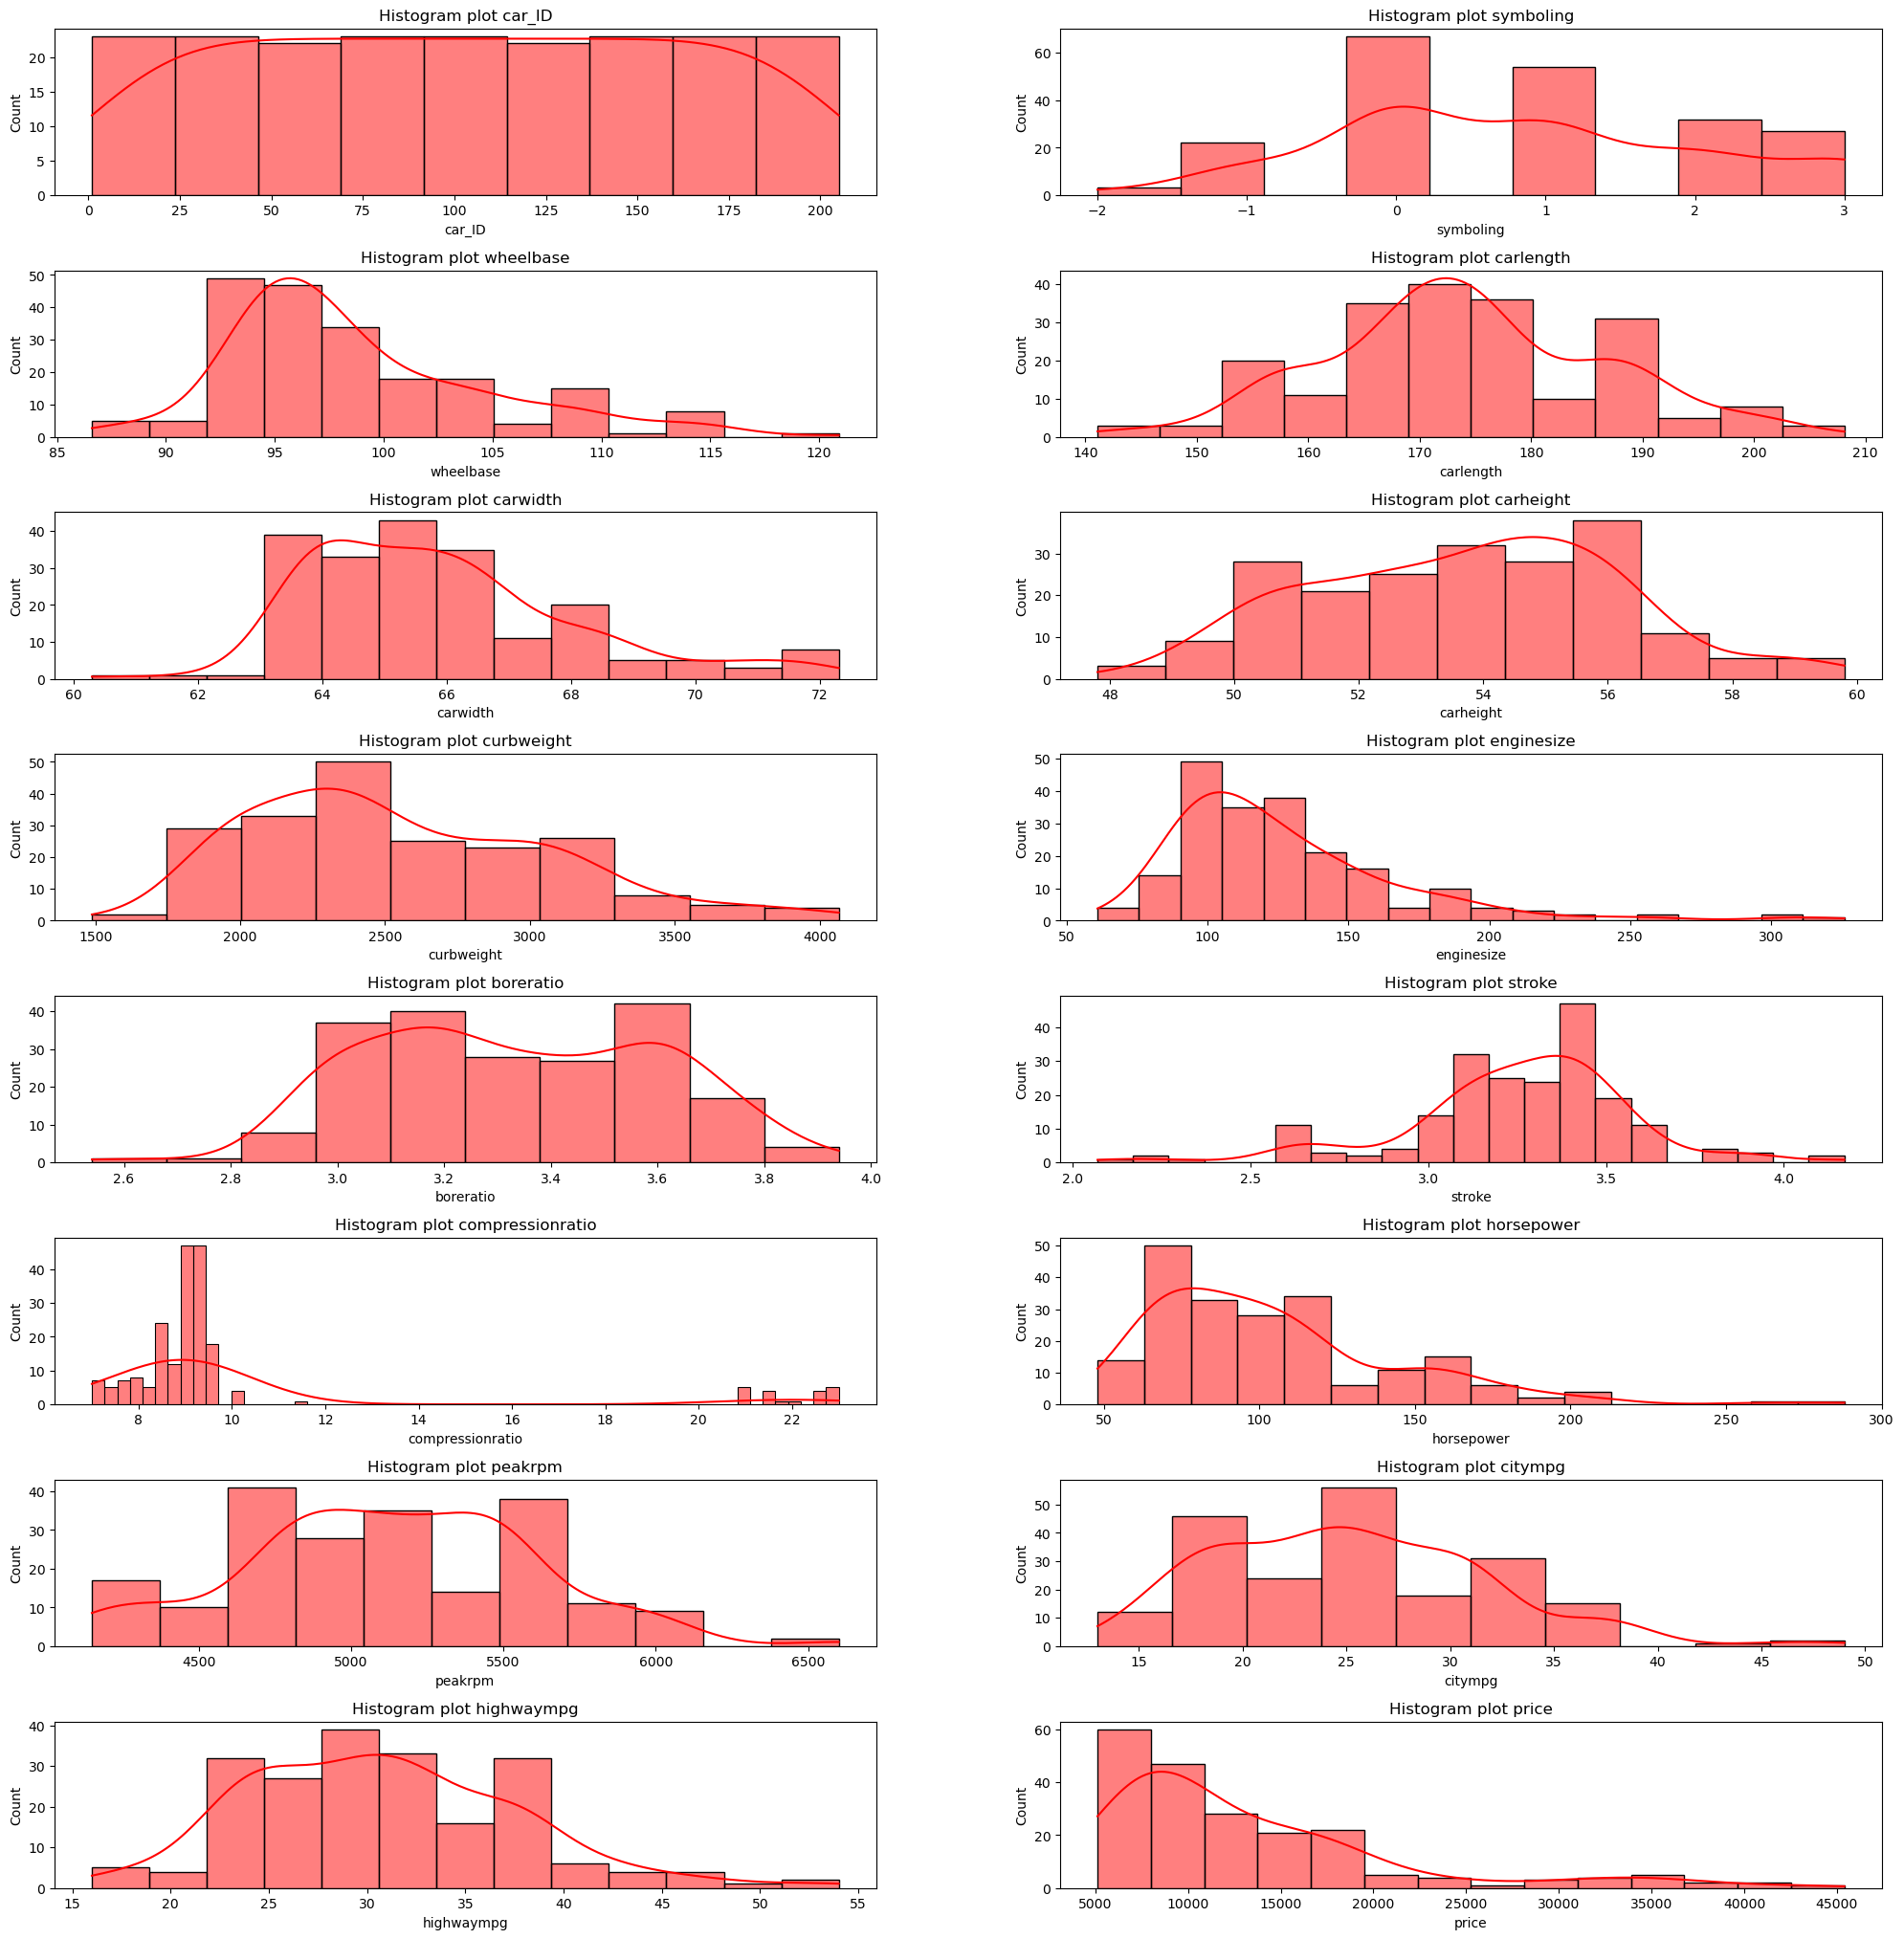

In [544]:
def histplots(data):
  data=data.select_dtypes("number")
  plt.figure(figsize=(20,25))
  for index,col in enumerate(data.columns,1):
    plt.subplot(10,2,index)
    plt.title(f"Histogram plot {col}")
    sns.histplot(x=col,data=data,color="red",kde=True)
  plt.tight_layout(w_pad=10)
  plt.show()

histplots(df)

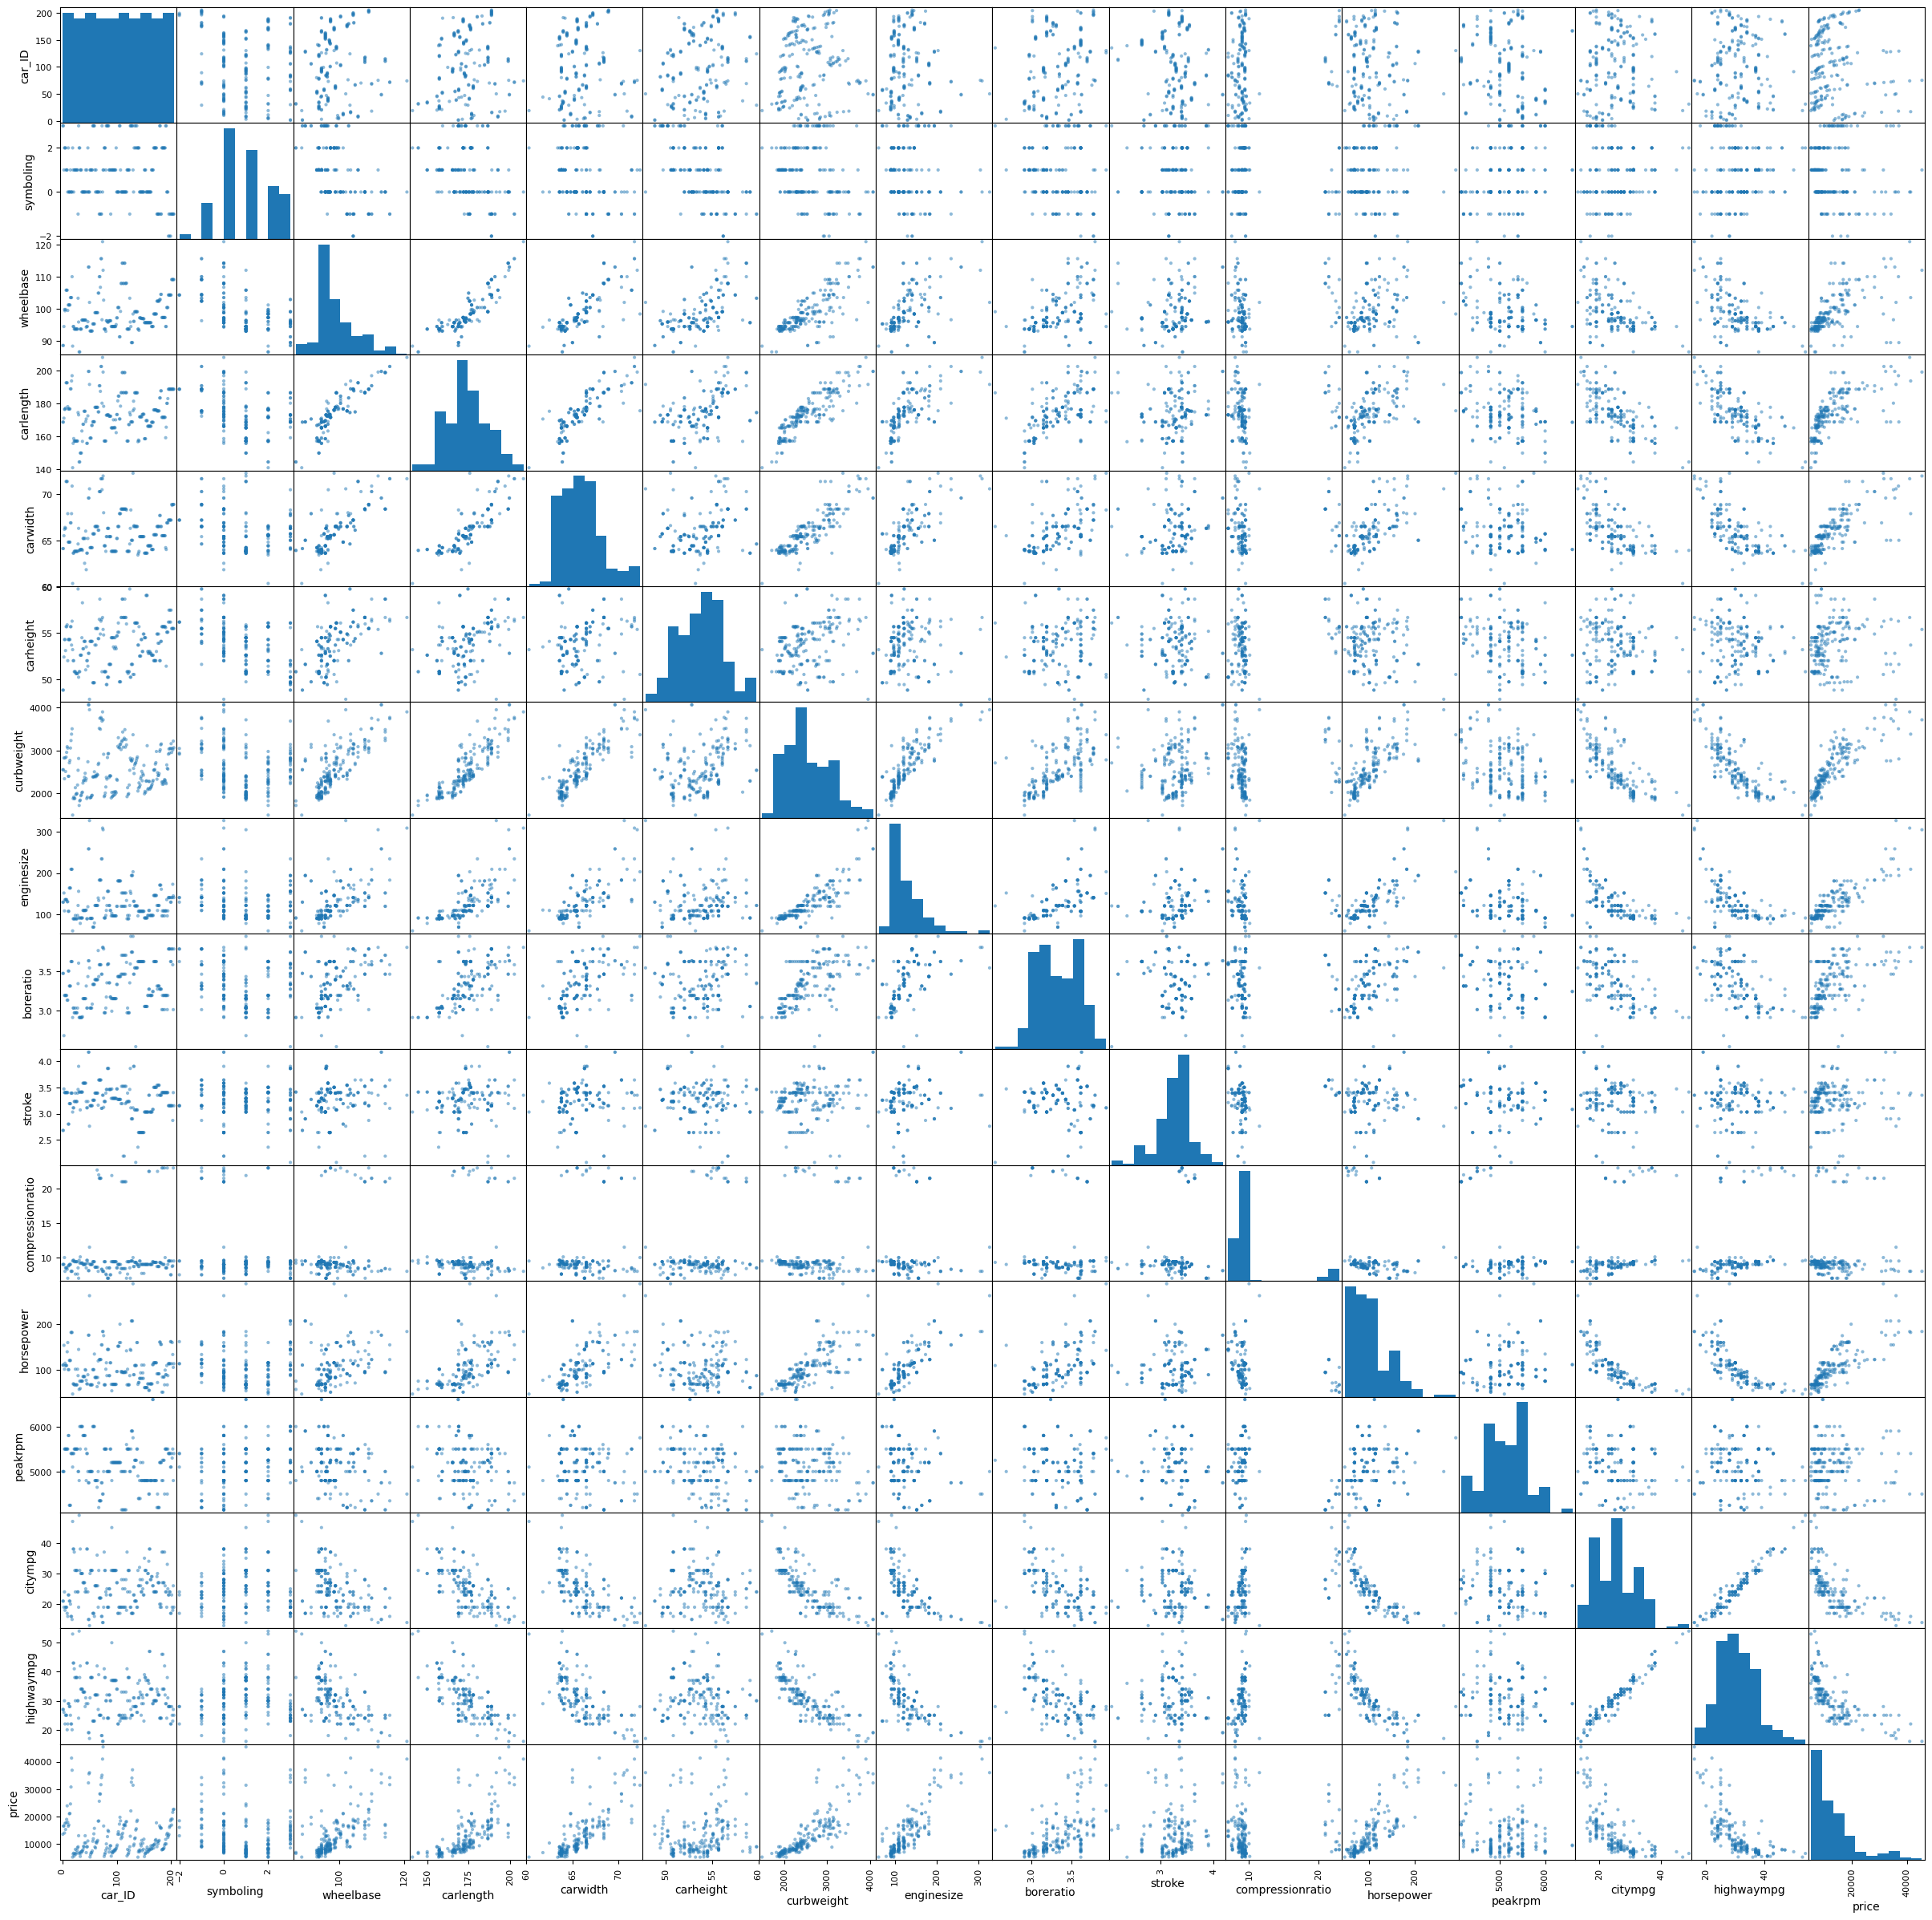

In [545]:
pd.plotting.scatter_matrix(df,figsize=(30,30))
plt.show()

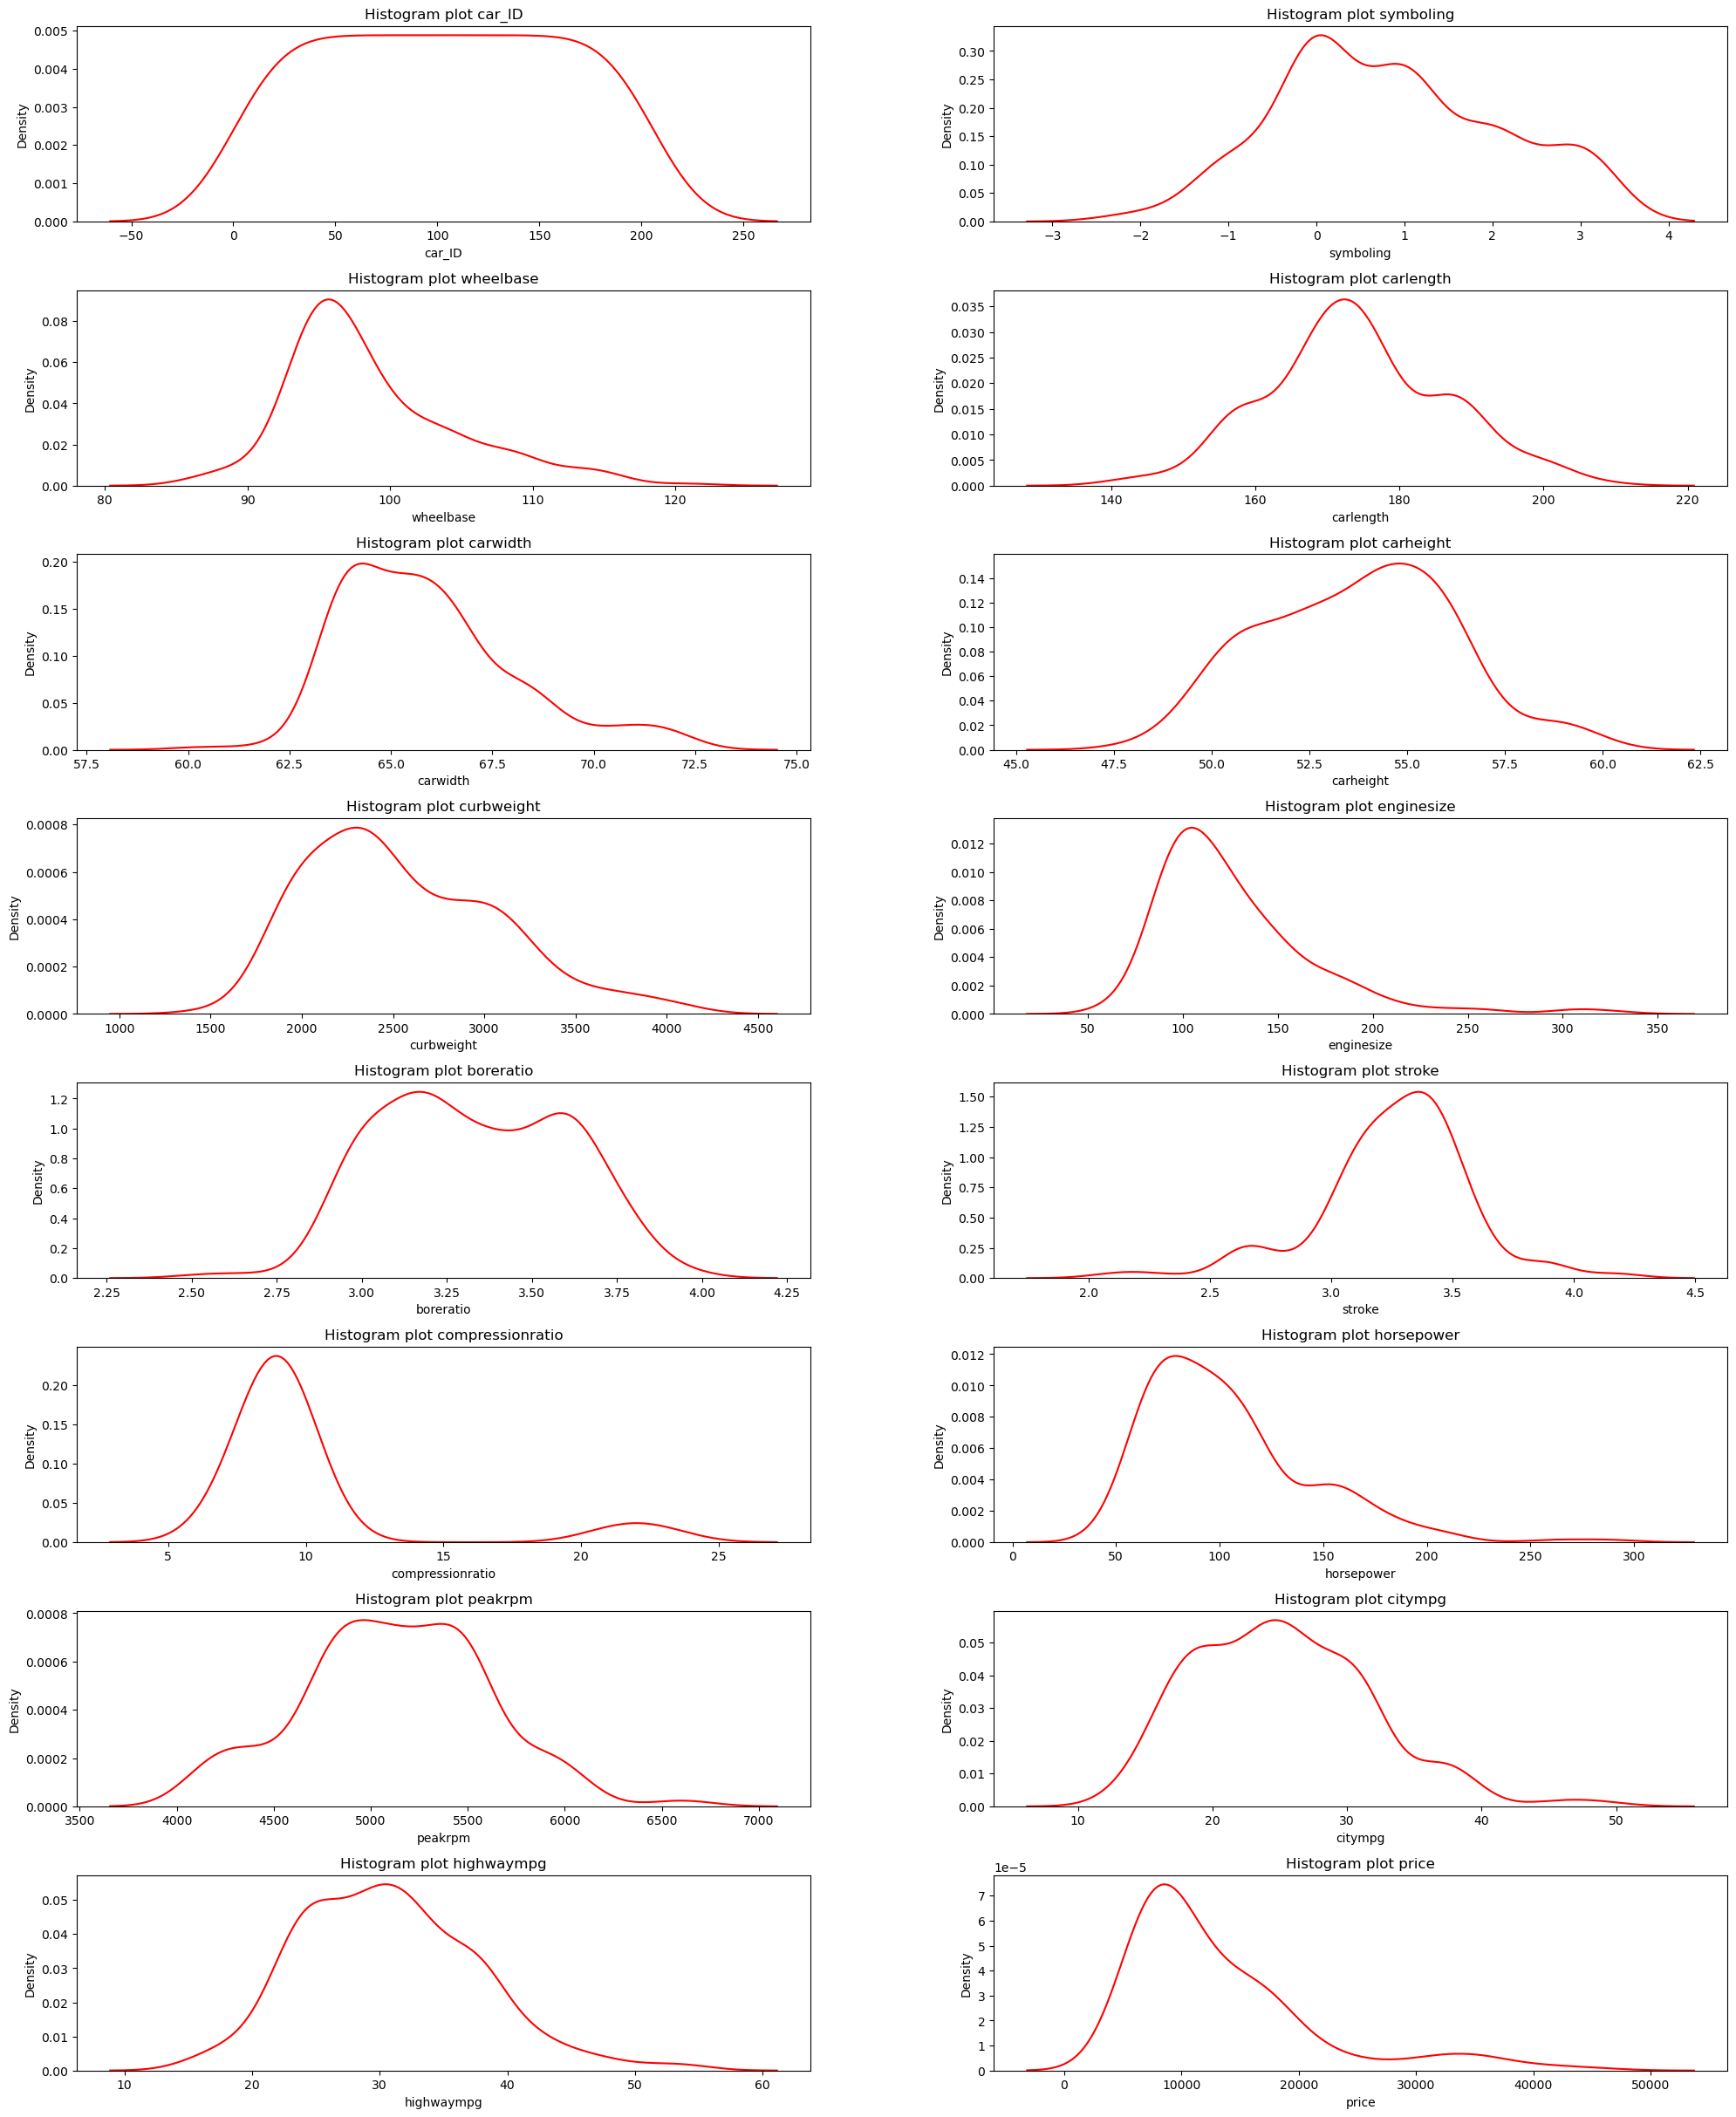

In [546]:
def kdeplots(data):
  data=data.select_dtypes("number")
  plt.figure(figsize=(20,30))
  for index,col in enumerate(data.columns,1):
    plt.subplot(10,2,index)
    plt.title(f"Histogram plot {col}")
    sns.kdeplot(x=col,data=data,color="red")
  plt.tight_layout(w_pad=10)
  plt.show()

kdeplots(df)

### Catgorical Data Distribution Graphs

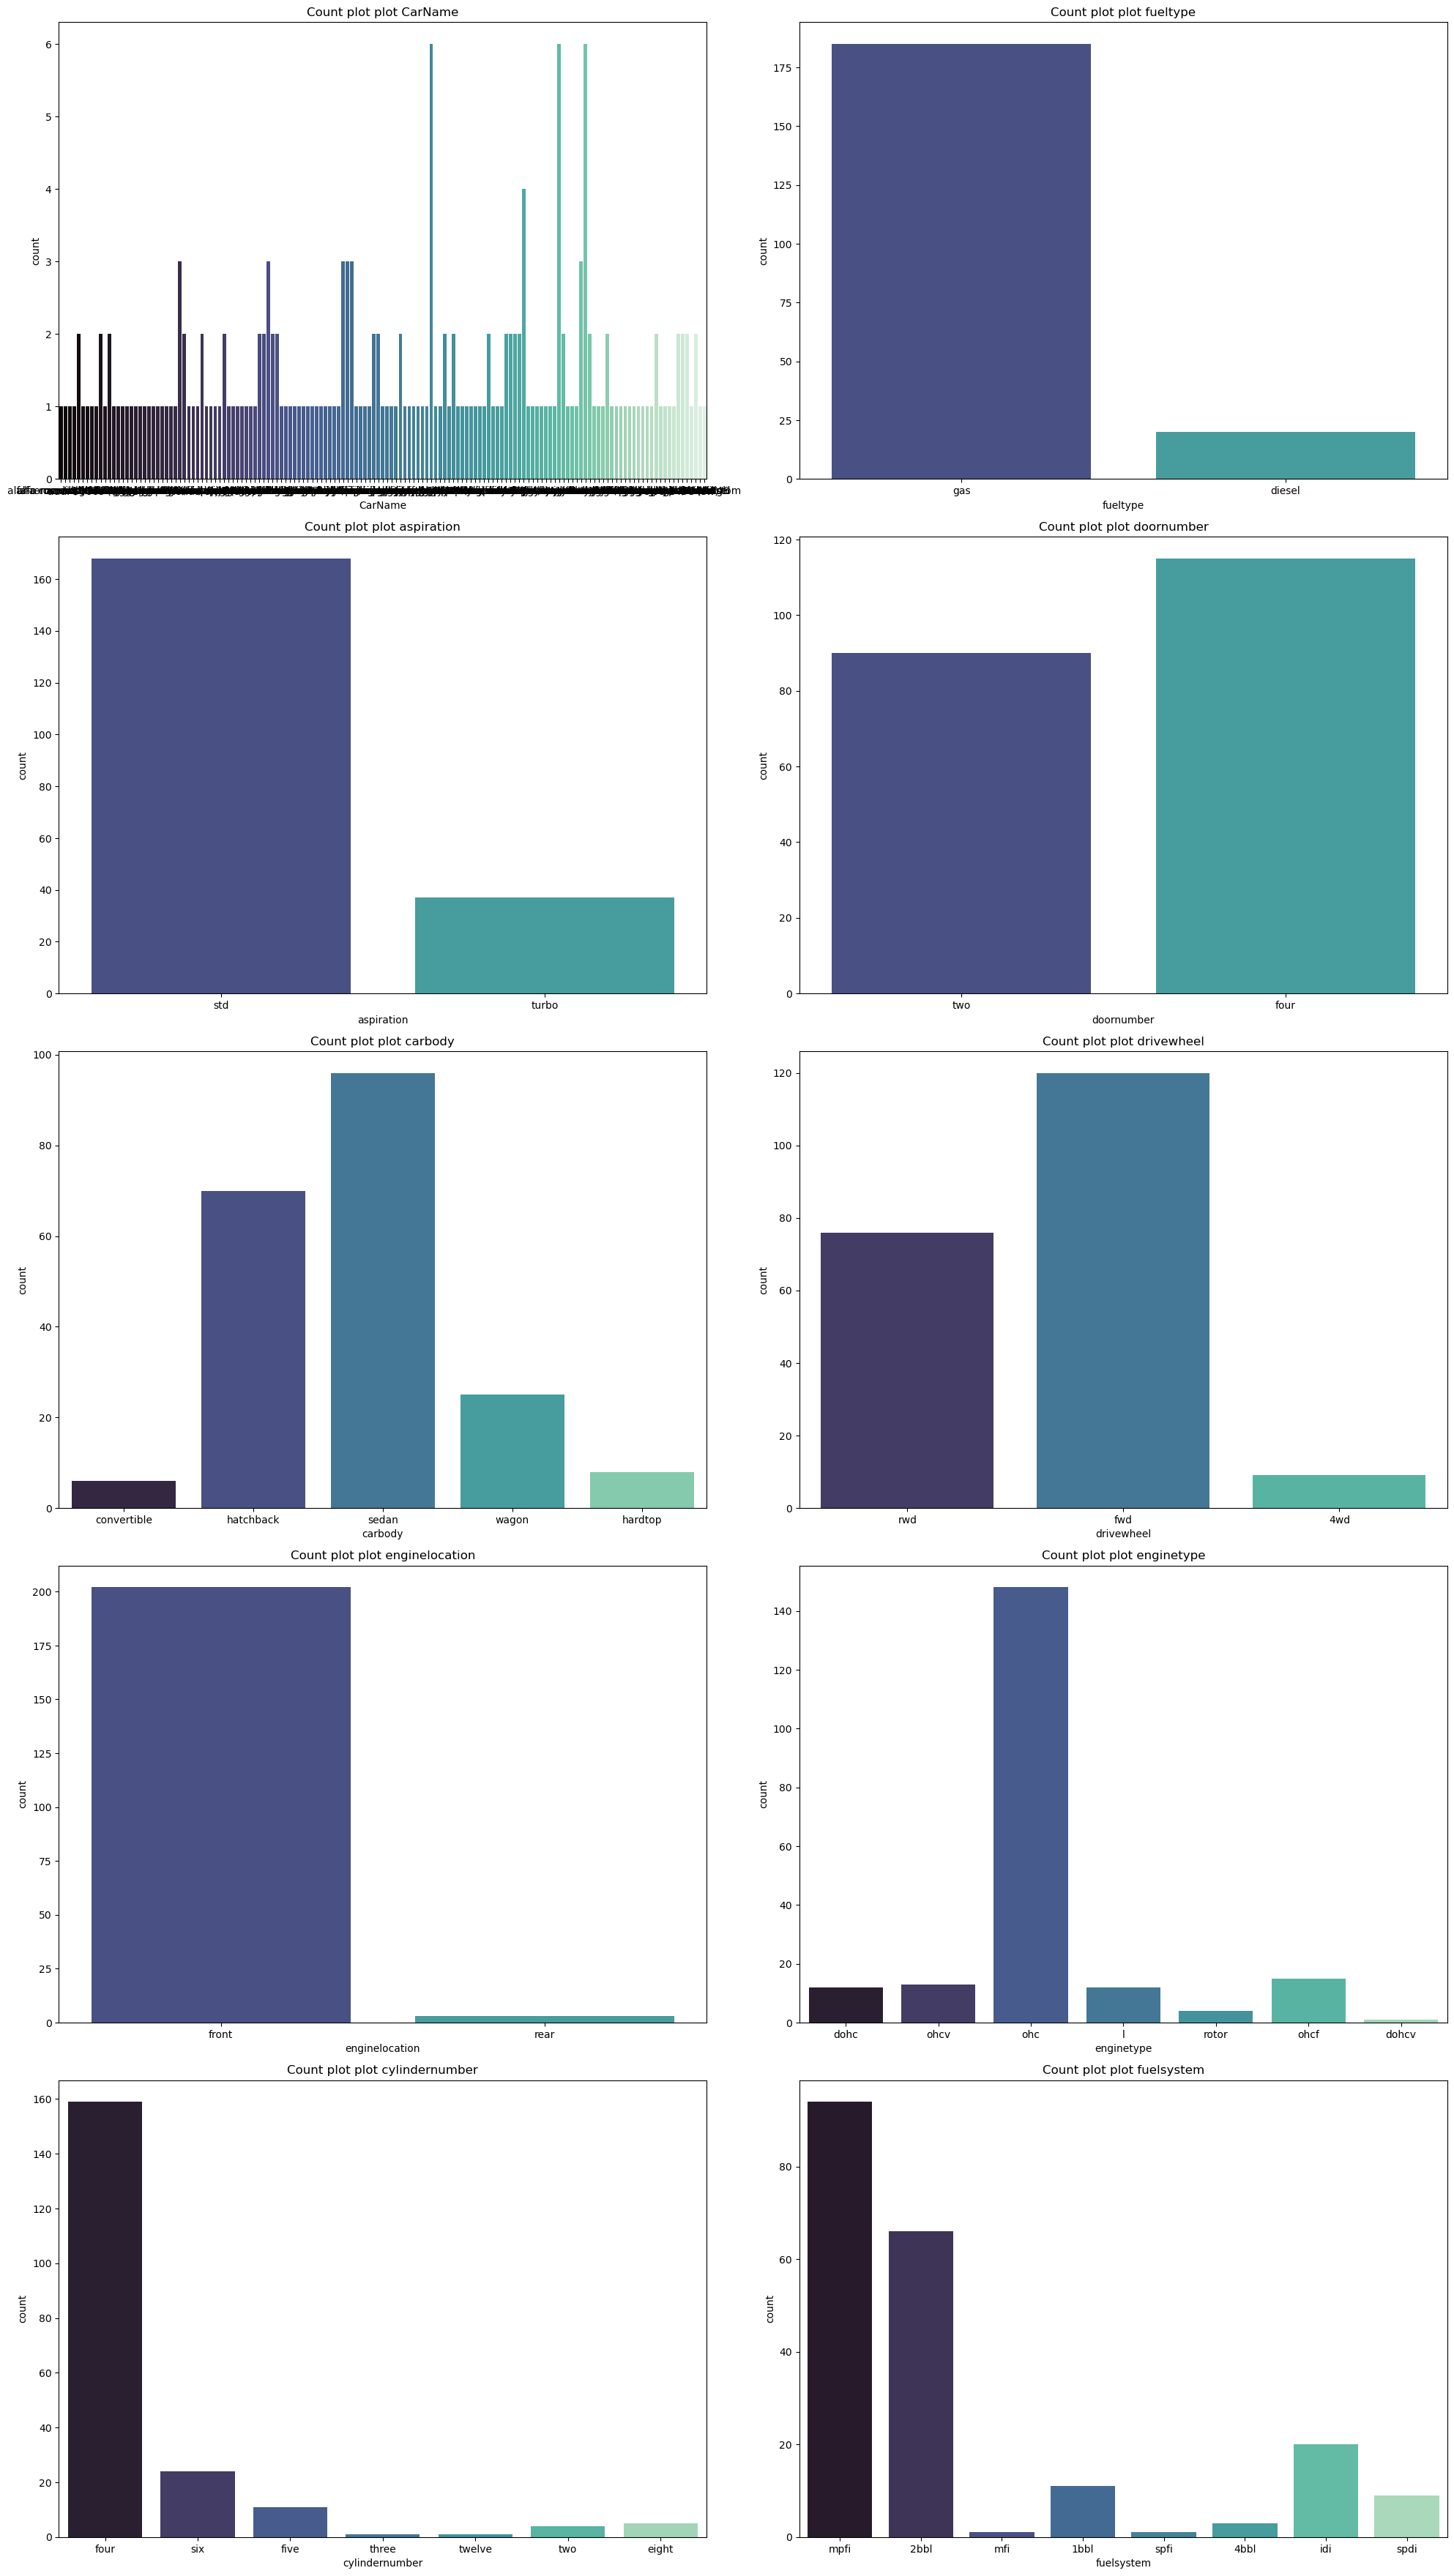

In [547]:
def countplots(data):
  data=data.select_dtypes("object")
  plt.figure(figsize=(20,70))
  for index,col in enumerate(data.columns,1):
    plt.subplot(10,2,index)
    plt.title(f"Count plot plot {col}")
    sns.countplot(x=col,data=data,palette="mako",hue=col)
  plt.tight_layout()
  plt.show()

countplots(df)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_7788\3644081985.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


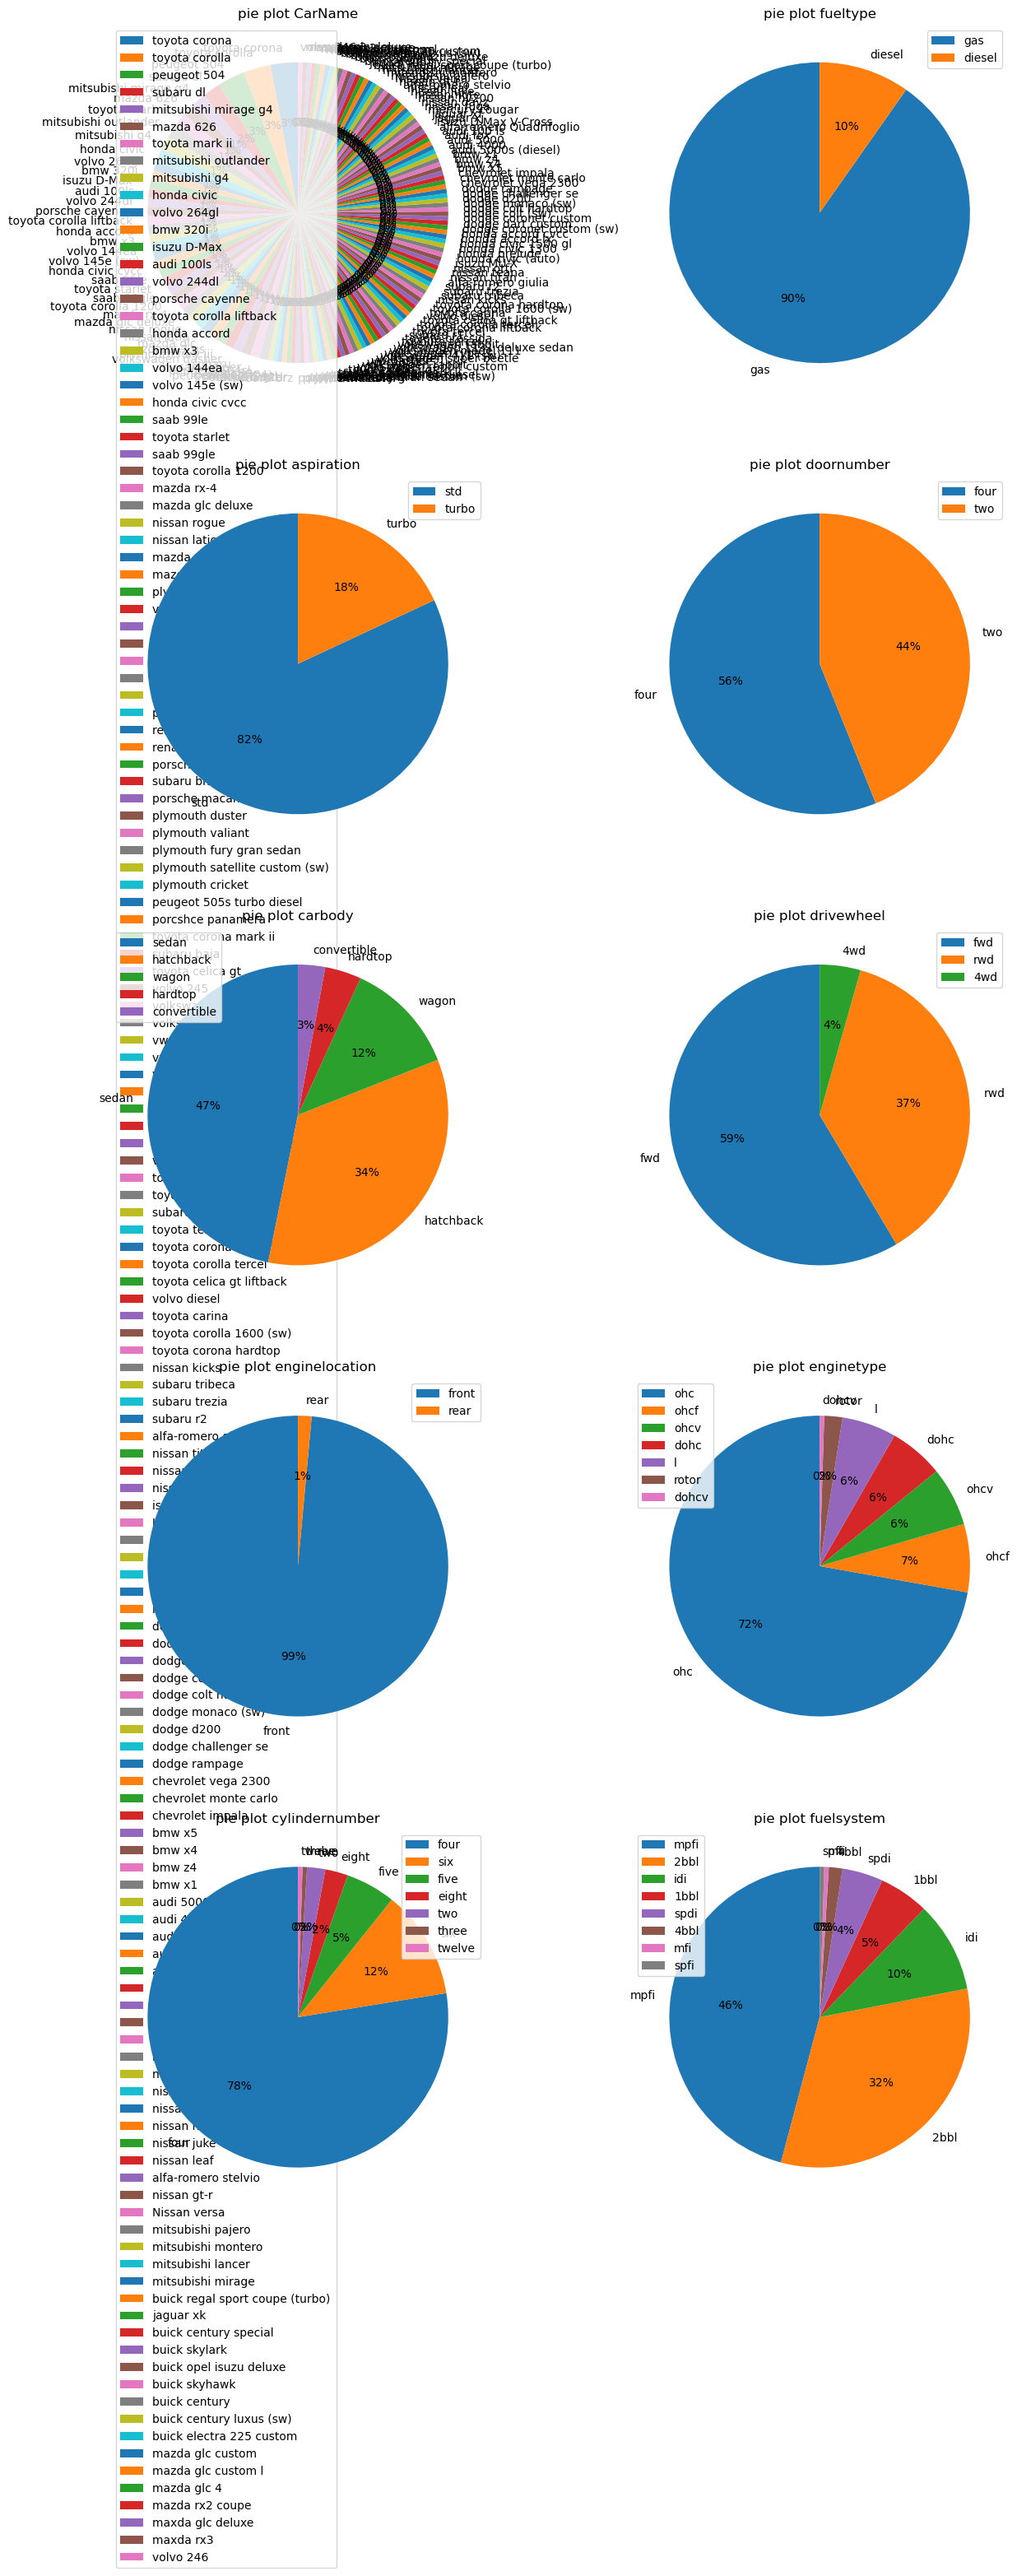

In [548]:
def pieplot(data):
  cat_cols=data.select_dtypes("object")
  plt.figure(figsize=(15,70))
  for index,col in enumerate(cat_cols.columns,1):
    plt.subplot(10,2,index)
    unique=data[col].value_counts()
    count=unique.values
    category=unique.index
    plt.title(f"pie plot {col}")
    plt.pie(count,labels=category,autopct="%1.0f%%",startangle=90)
    plt.legend()
  plt.tight_layout()
  plt.show()

pieplot(df)

### Corelations ###

<Axes: >

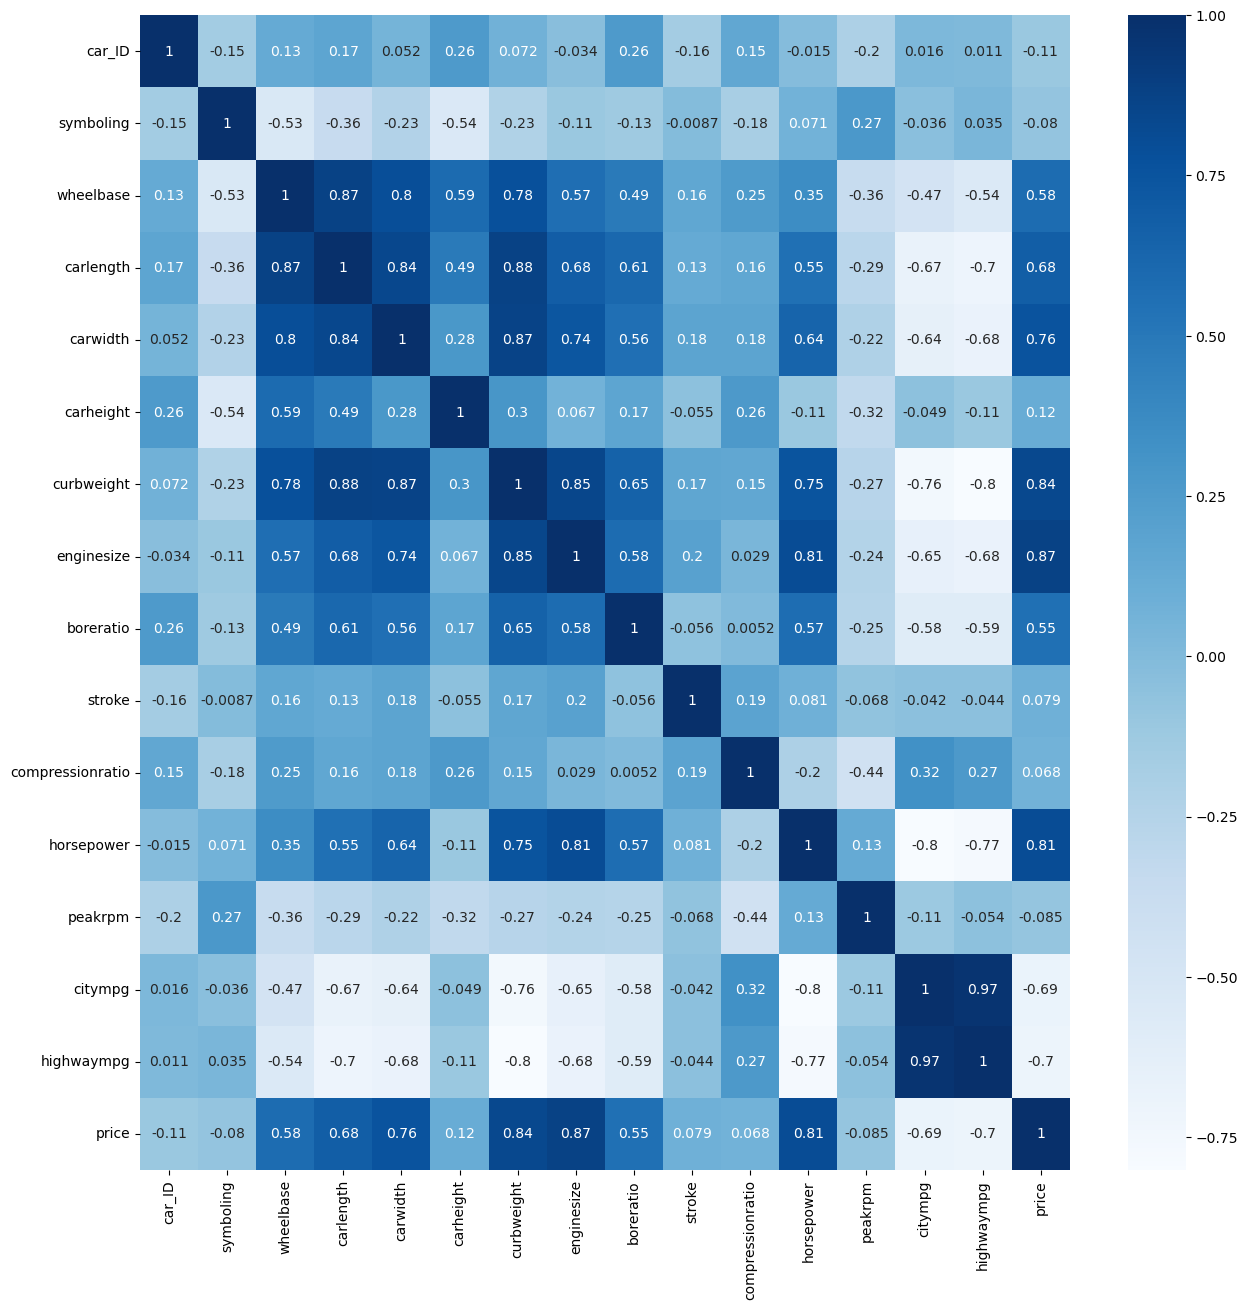

In [549]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="Blues")

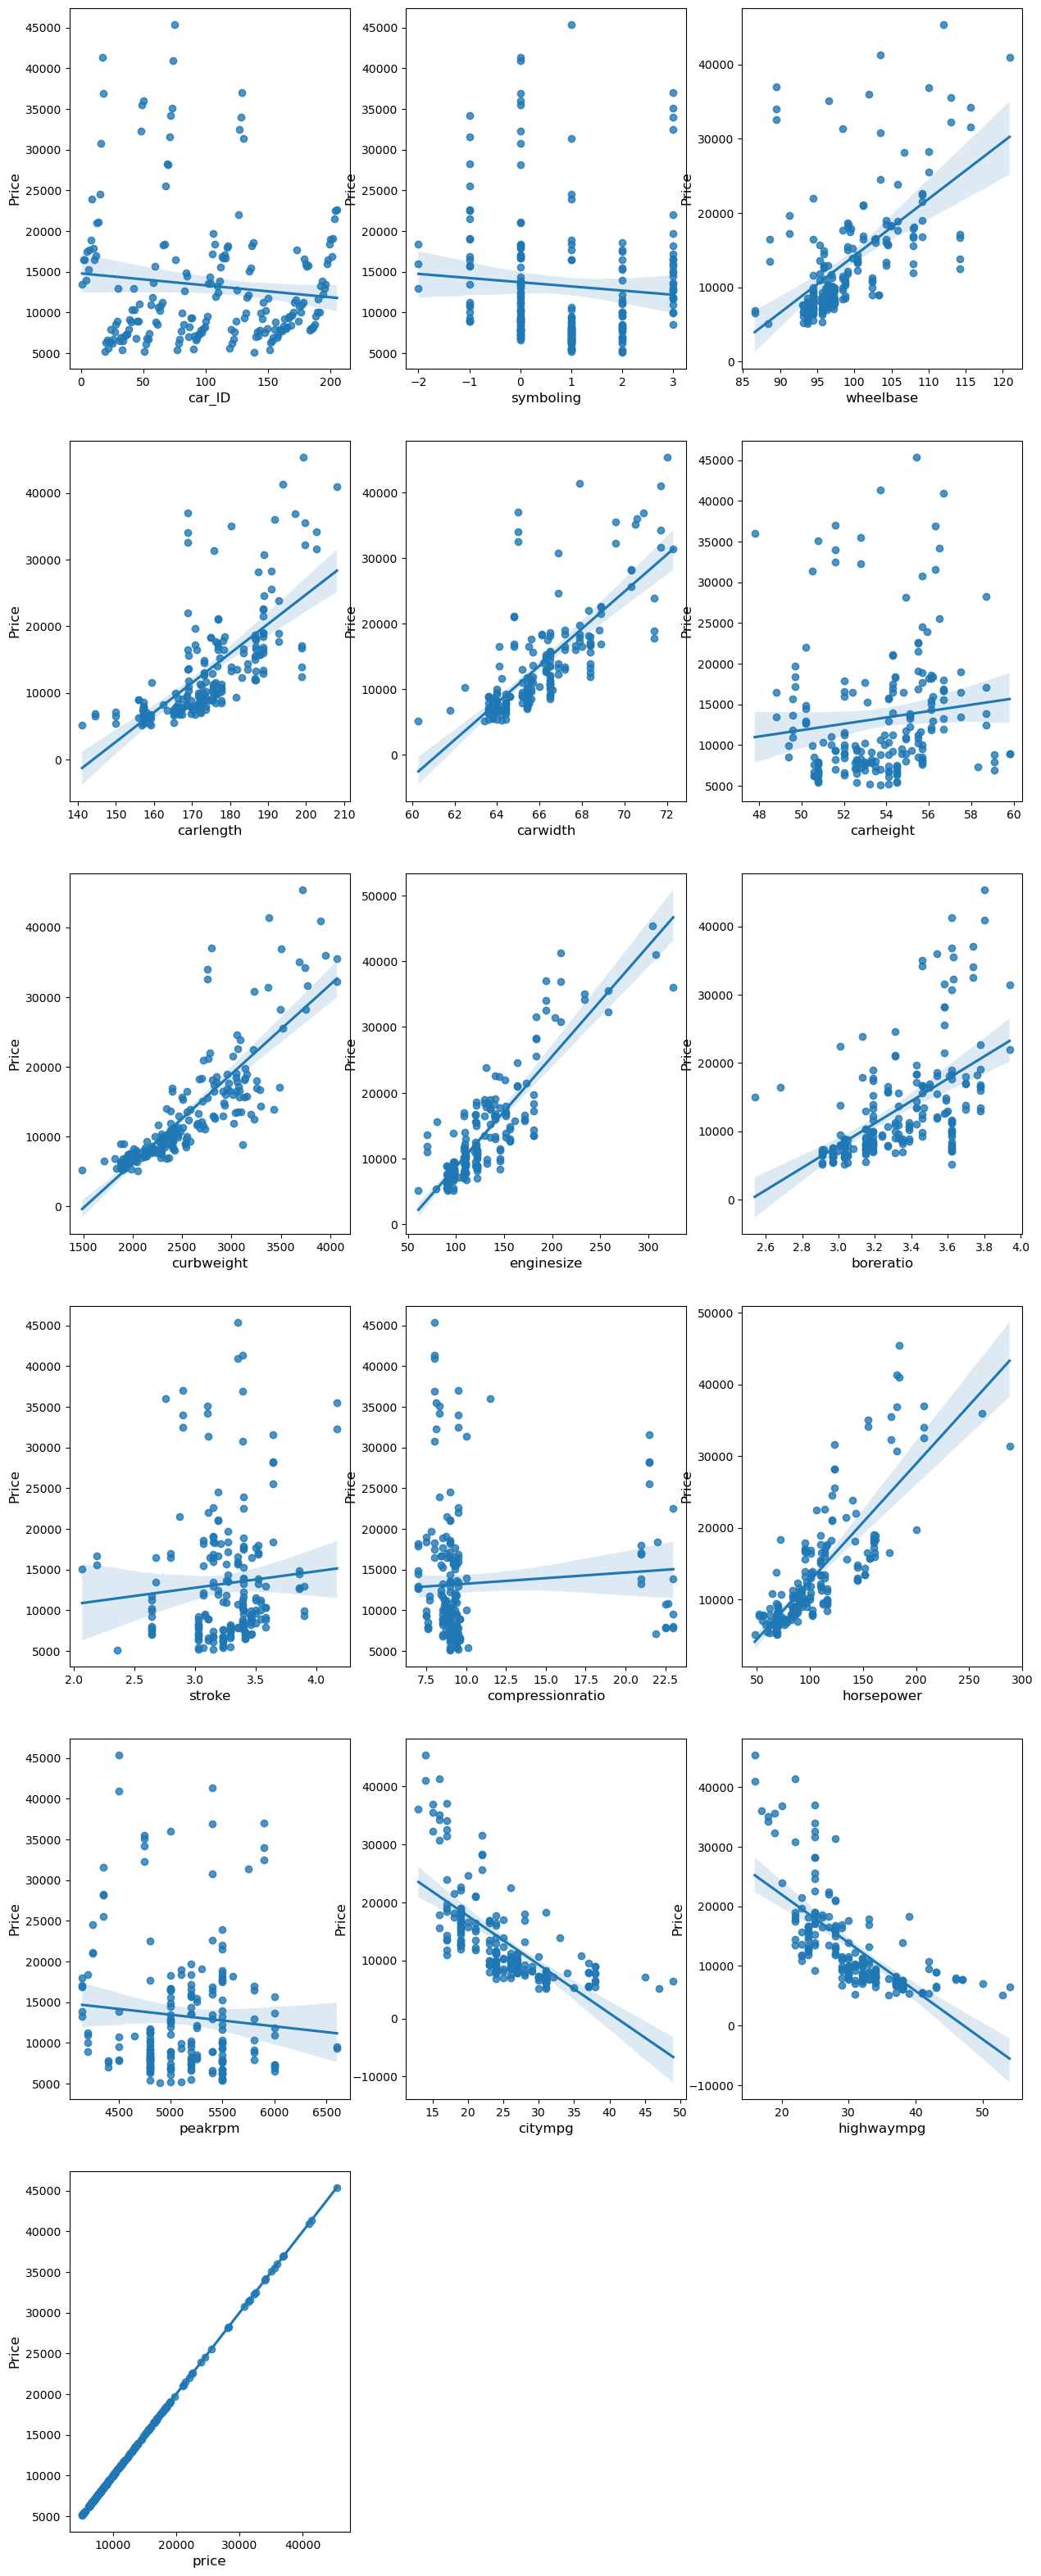

In [550]:
# target relationship with numeric_only=True
df_numeric = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15,40))
for i in range(len(df_numeric.columns)):
    plt.subplot(6,3,i+1)
    sns.regplot(x=df_numeric.columns[i], y=df['price'], data=df_numeric)
    plt.xlabel(df_numeric.columns[i], fontsize=12)
    plt.ylabel('Price', fontsize=12)

## Categorical VS numeric ( Price )

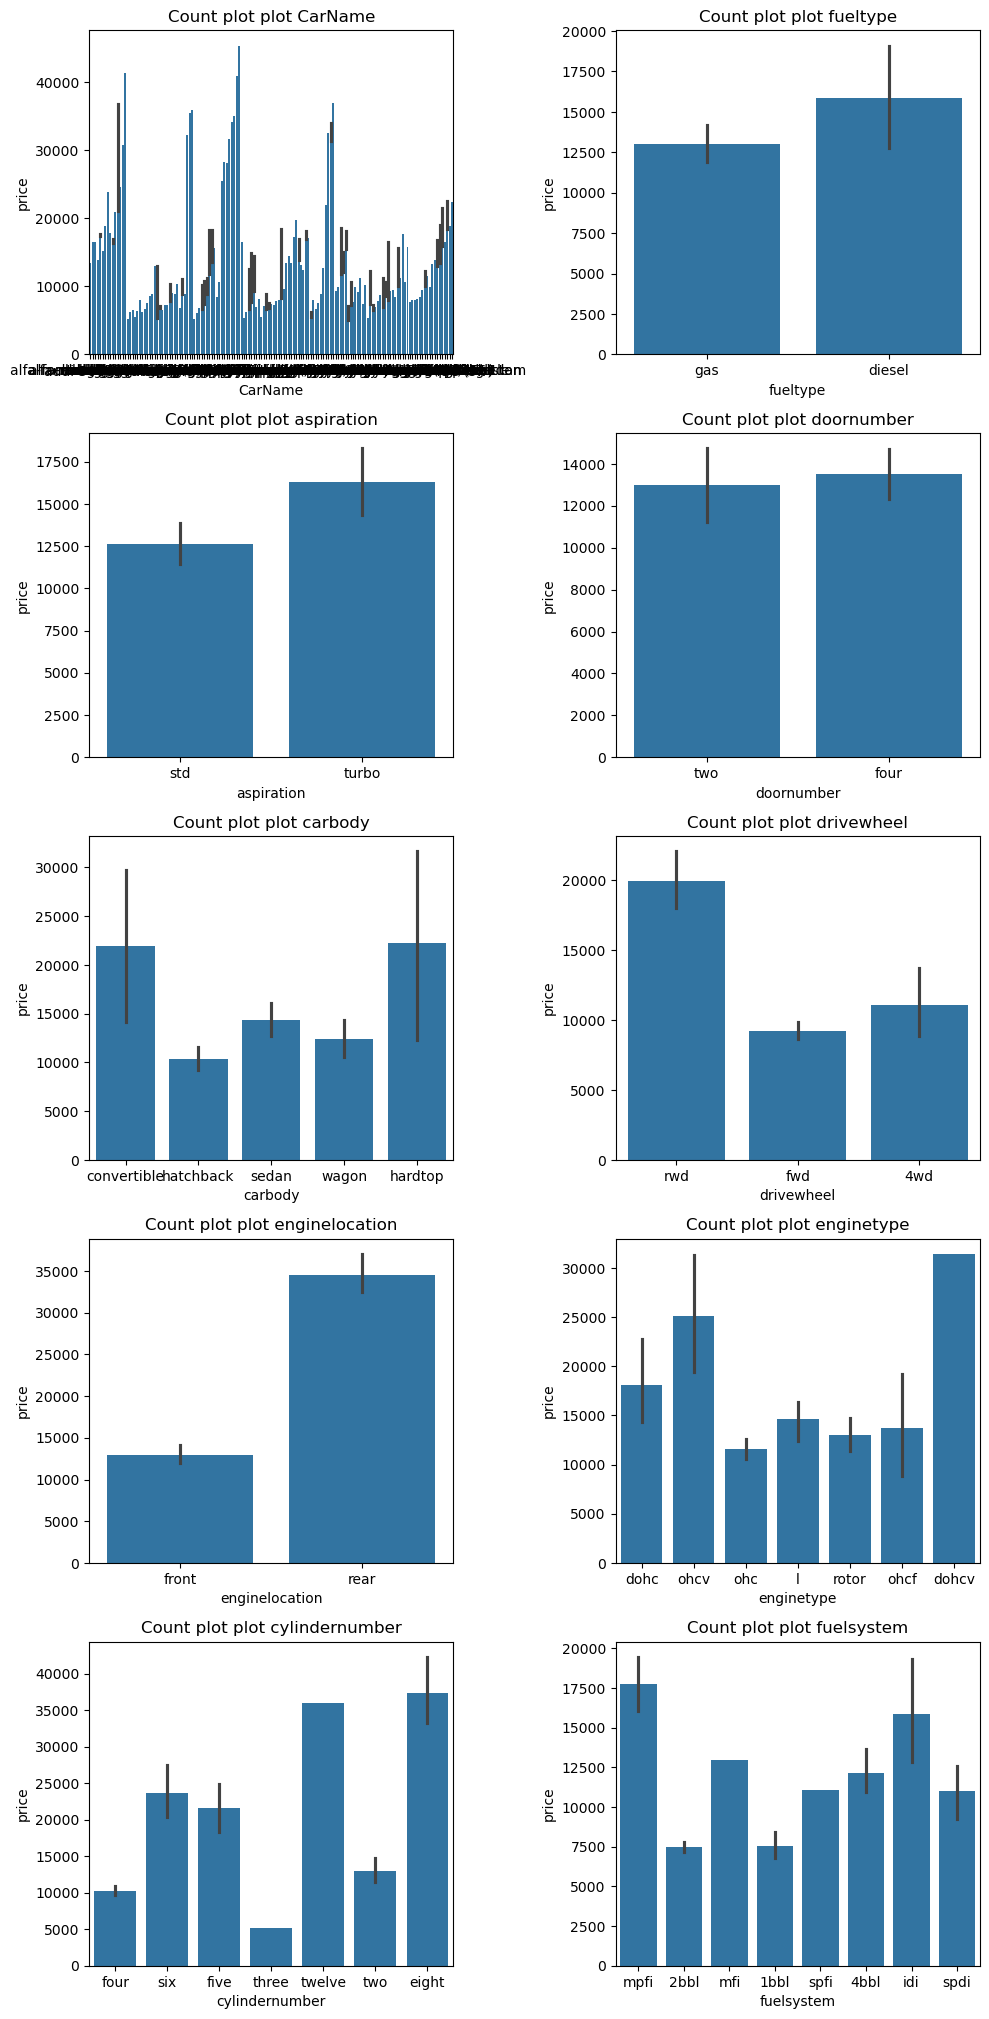

In [551]:
def barplot(data):
  data1=data.select_dtypes(include="object")
  plt.figure(figsize=(10,40))
  for index,col in enumerate(data1.columns,1):
    plt.subplot(10,2,index)
    plt.title(f"Count plot plot {col}")
    sns.barplot(y="price",x=col,data=data)
  plt.tight_layout()
  plt.show()
barplot(df)

# Data pre Preprocessing

### Drop Un-necessary Columns

In [552]:
#drop car id and car name coloumns
#no need to use them in the preprocessing
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

### Change Data Type

In [553]:
# convert int64 to float64
cols=["curbweight","enginesize","horsepower","peakrpm","citympg","highwaympg"]
df[cols]=df[cols].astype("float64")
## convert int64 to categorical
cols=["symboling"]
df[cols]=df[cols].astype("object")


### Handle Null Values

In [554]:
pd.DataFrame({"Null %":(df.isnull().sum()/df.shape[0])*100,"Null count":(df.isnull().sum())}).T

symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
Null %            0.0       0.0         0.0         0.0      0.0         0.0   
Null count        0.0       0.0         0.0         0.0      0.0         0.0   

            enginelocation  wheelbase  carlength  carwidth  ...  enginesize  \
Null %                 0.0        0.0        0.0       0.0  ...         0.0   
Null count             0.0        0.0        0.0       0.0  ...         0.0   

            fuelsystem  boreratio  stroke  compressionratio  horsepower  \
Null %             0.0        0.0     0.0               0.0         0.0   
Null count         0.0        0.0     0.0               0.0         0.0   

            peakrpm  citympg  highwaympg  price  
Null %          0.0      0.0         0.0    0.0  
Null count      0.0      0.0         0.0    0.0  

[2 rows x 24 columns]

### Handle Outliers

In [555]:
def handle_outliers(data,columns,method="IQR",threshold=1.5,strategy="replace"):
  total_outliers=0
  for col in columns:
    if method=="IQR":
      Q1=data[col].quantile(0.25)
      Q3=data[col].quantile(0.75)
      IQR=Q3-Q1
      lower_bound=Q1-threshold*IQR
      upper_bound=Q3+threshold*IQR
    elif method=="zscore":
      pass
    else:
      raise ValueError("Invalid method. Choose 'IQR' or 'Zscore'")

    outliers=data[(data[col]<lower_bound) | (data[col]>upper_bound)]
    outliers_count = len(outliers)
    total_outliers += outliers_count
    print(f"Column {col} has {outliers_count} outliers")

    if  strategy=="replace":
      data[col]=np.clip(data[col],lower_bound,upper_bound)
    elif strategy=="remove":
      data=data[(data[col]>=lower_bound) & (data[col]<= upper_bound)]
    else:
       raise ValueError("Invalid strategy. Choose 'replace' or 'remove'")

  print(f"Total outliers across all columns: {total_outliers}")
  return data


columns_to_process=num_cols
df=handle_outliers(df,columns_to_process,method="IQR",threshold=1.5,strategy="replace")



Column wheelbase has 3 outliers
Column carlength has 1 outliers
Column carwidth has 8 outliers
Column carheight has 0 outliers
Column boreratio has 0 outliers
Column stroke has 20 outliers
Column compressionratio has 28 outliers
Column price has 15 outliers
Total outliers across all columns: 75


### Handle Duplication

In [556]:
display(df.duplicated().sum())
## there is no duplication
df.drop_duplicates(inplace=True)

3

# Split data

### take the darget alone

In [557]:
y=df["price"]
x=df.drop(columns="price")


### Split the data into training and testing sets


In [558]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Scalling

In [559]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
scaler=StandardScaler()
x_train[["carlength","curbweight","enginesize","horsepower","highwaympg"]]=scaler.fit_transform(x_train[["carlength","curbweight","enginesize","horsepower","highwaympg"]])
x_test[["carlength","curbweight","enginesize","horsepower","highwaympg"]]=scaler.transform(x_test[["carlength","curbweight","enginesize","horsepower","highwaympg"]])
print(f"Prameters of the fit method :\n Mean : {scaler.mean_}\n Standard deviation : {scaler.scale_}")

Prameters of the fit method :
 Mean : [ 174.41118012 2544.22981366  125.52173913  102.11801242   30.60248447]
 Standard deviation : [ 12.00812868 491.56773224  40.44106009  35.56524559   6.57331279]
